In [78]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import math
import piecewise_regression
#%matplotlib qt
%matplotlib inline

In [79]:
#def old fit function
def original(T, a_0, a_12, a_1, b_12, b_1, b_32):
    upper  = a_0 + (a_12)*(T**(1/2)) + a_1*T
    lower = T**(1/6) + (b_12)*(T**(1/2)) + (b_1)*(T) + (b_32)*(T**(3/2))
    value = upper/lower
    return 1000000000000* value

#def new fit function
def new(T, a, b, gamma):
    value = a * ((T/300)**b) * np.exp(-gamma/T)
    return 1000000000000*value

#create space for tempatures
temps = np.logspace(0.001, 4, 100000)

[ 3.18673310e-10 -1.78651253e-01  4.99027642e-02]
[3.90692308e-14 4.88894754e-05 3.64455152e-04]


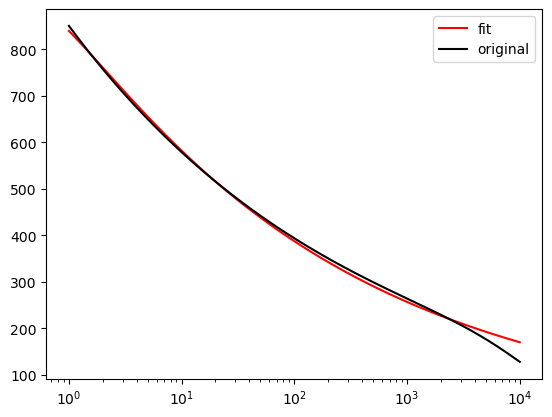

In [80]:
#recover original rates from our function
rates = []
for temp in temps:
    rate = rate = original(temp, 8.5145E-10, 0, 0, 9.5666E-04, -4.4040E-05, 2.3496E-06)
    rates.append(rate)

#find fit function
popt, pcov = optimize.curve_fit(new, temps, rates, method="lm")
perr = np.sqrt(np.diag(pcov))
print (popt)
print (perr)

#find new rates based on new fit function
fit_rates = []
for temp in temps:
    fit_rate = new(temp, popt[0], popt[1], popt[2])
    
    fit_rates.append(fit_rate)

#plot
plt.plot(temps, fit_rates, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
plt.legend()

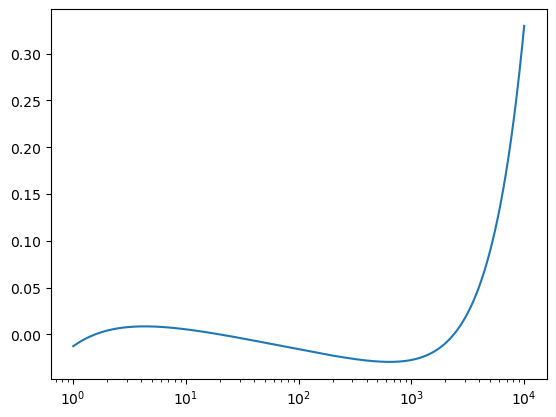

In [81]:
#plot percent error
percent = []
for char in range(len(fit_rates)):
    num = (fit_rates[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")


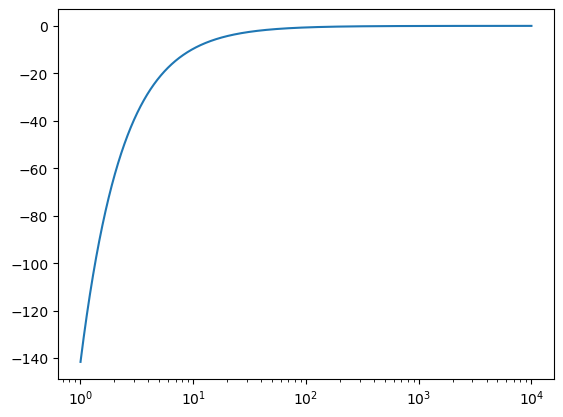

In [82]:
#plot derivative
deriv = np.gradient(original(temps, 8.5145E-10, 0, 0, 9.5666E-04, -4.4040E-05, 2.3496E-06), temps)
plt.plot(temps, deriv)
plt.xscale("log")


In [83]:
deriv1 = np.diff(rates) / np.diff(temps)
deriv_1_x = (np.array(temps)[:-1] + np.array(temps)[1:]) / 2

deriv2 = np.diff(deriv1) / np.diff(deriv_1_x)
deriv_2_x = (np.array(deriv_1_x)[:-1] + np.array(deriv_1_x)[1:]) / 2

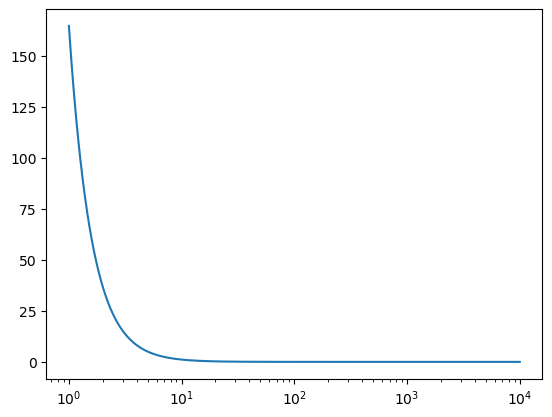

In [84]:
plt.plot(deriv_2_x, deriv2)
plt.xscale("log")

As per Paul et al 2022, split into sections

In [106]:
def new_2(T, T1, a1, b1, gamma1, b2, gamma2):
    a2 = (a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))

    return np.piecewise(T, [(T <= T1), (T> T1)], 
                        [lambda T:1000000000000*(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:1000000000000*(a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))*((T/300)**b2) * np.exp(-gamma2/T)])

In [107]:
guess = [1e2, 3.26861968e-10, -1.68304797e-01,  4.41413316e-03, -4.28319281e-01, 3.66065039e+02]
popt, pcov = optimize.curve_fit(new_2, temps, rates, p0 = guess, method="lm")

In [108]:
popt

array([ 1.31375099e+03,  3.26136798e-10, -1.69146489e-01,  7.84171170e-03,
       -4.22013057e-01,  3.32205009e+02])

In [109]:
fit_rates2 = []
for temp in temps:
    fit_rate2 = new_2(temp, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
    fit_rates2.append(fit_rate2)

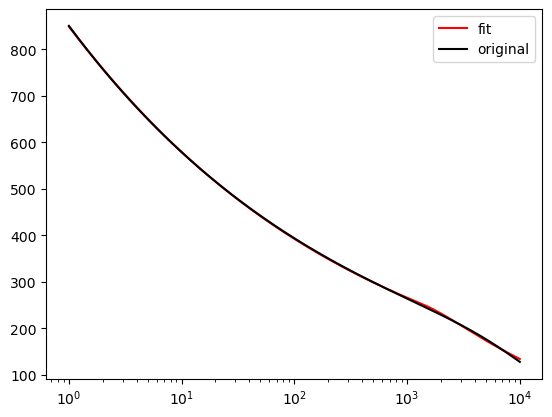

In [110]:
#plot
plt.plot(temps, fit_rates2, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
#plt.yscale("log")
plt.legend()

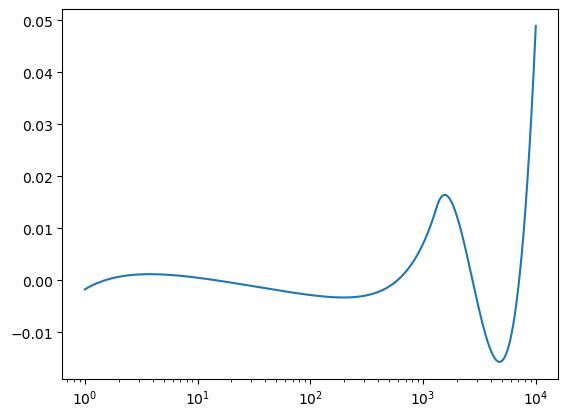

In [111]:
#plot percent error
percent = []
for char in range(len(fit_rates2)):
    num = (fit_rates2[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")

In [112]:
def new_4(T, T1, T2, T3, 
          a1, b1, gamma1, 
          a2, b2, gamma2,
          a3, b3, gamma3,
          a4, b4, gamma4,
         ):   

    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<T3), T>T3], 
                        [lambda T:1000000000000*(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:1000000000000*(a2 * ((T/300)**b2) * np.exp(-gamma2/T)),
                         lambda T:1000000000000*(a3 * ((T/300)**b3) * np.exp(-gamma3/T)),
                         lambda T:1000000000000*(a4 * ((T/300)**b4) * np.exp(-gamma4/T))])